In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\python_ws\Pandas\out.csv")

In [4]:
df.head()

,Unnamed: 0,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle,mean_rating,view_count,adjusted_mean_rating
0,0,1488844,3,2005-09-06,1,2003.0,Dinosaur Planet,3.749543,547,3.749543
1,1,822109,5,2005-05-13,1,2003.0,Dinosaur Planet,3.749543,547,3.749543
2,2,885013,4,2005-10-19,1,2003.0,Dinosaur Planet,3.749543,547,3.749543
3,3,30878,4,2005-12-26,1,2003.0,Dinosaur Planet,3.749543,547,3.749543
4,4,823519,3,2004-05-03,1,2003.0,Dinosaur Planet,3.749543,547,3.749543


## Step 4: Ask questions about the data

### What are the top 10 most watched movies in each year ?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74400650 entries, 0 to 74400649
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   CustId                int64  
 2   Rating                int64  
 3   Date                  object 
 4   MovieId               int64  
 5   ReleaseYear           float64
 6   MovieTitle            object 
 7   mean_rating           float64
 8   view_count            int64  
 9   adjusted_mean_rating  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 5.5+ GB


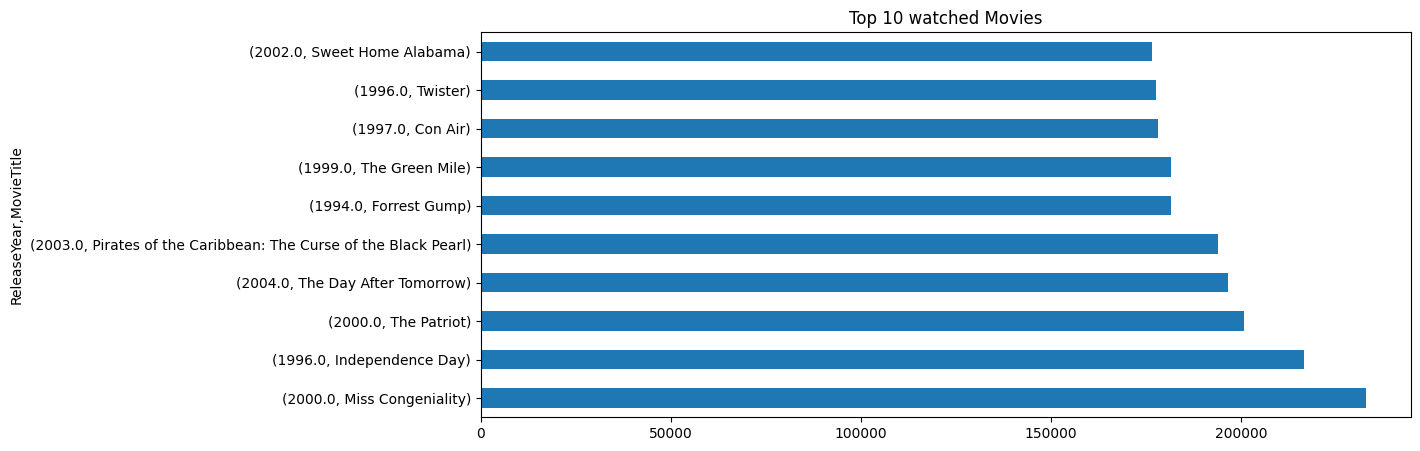

In [5]:
ah = df.groupby(['ReleaseYear','MovieTitle']).MovieId.count().sort_values(ascending=False).head(10).plot(
    kind= 'barh',
    figsize=(12,5),
    title = 'Top 10 watched Movies'
)

In [6]:
ah

<Axes: title={'center': 'Top 10 watched Movies'}, ylabel='ReleaseYear,MovieTitle'>

### What are the most re-watched movies ?

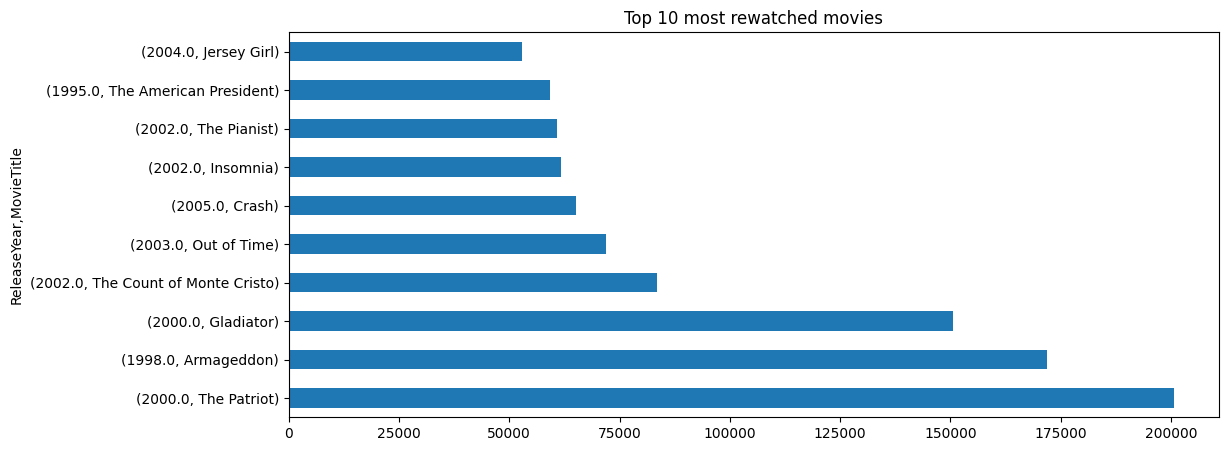

In [7]:
bh = df.loc[df.mean_rating != df.adjusted_mean_rating
].groupby(['ReleaseYear','MovieTitle']).MovieId.count().sort_values(ascending=False).head(10).plot(
        kind='barh',
        figsize=(12,5),
        title = 'Top 10 most rewatched movies'
)

In [8]:
df['view_range'] = pd.cut(
    x=df.view_count,
    bins=[1,1000,10000,100000,np.inf],
    labels=['very low','low','medium','high']
)

In [9]:
df.head()

,Unnamed: 0,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle,mean_rating,view_count,adjusted_mean_rating,view_range
0,0,1488844,3,2005-09-06,1,2003.0,Dinosaur Planet,3.749543,547,3.749543,very low
1,1,822109,5,2005-05-13,1,2003.0,Dinosaur Planet,3.749543,547,3.749543,very low
2,2,885013,4,2005-10-19,1,2003.0,Dinosaur Planet,3.749543,547,3.749543,very low
3,3,30878,4,2005-12-26,1,2003.0,Dinosaur Planet,3.749543,547,3.749543,very low
4,4,823519,3,2004-05-03,1,2003.0,Dinosaur Planet,3.749543,547,3.749543,very low


### Top 10 rated movies over 100k views.

In [10]:
ch = df.loc[df.view_range =='high',['MovieTitle','mean_rating']].drop_duplicates()

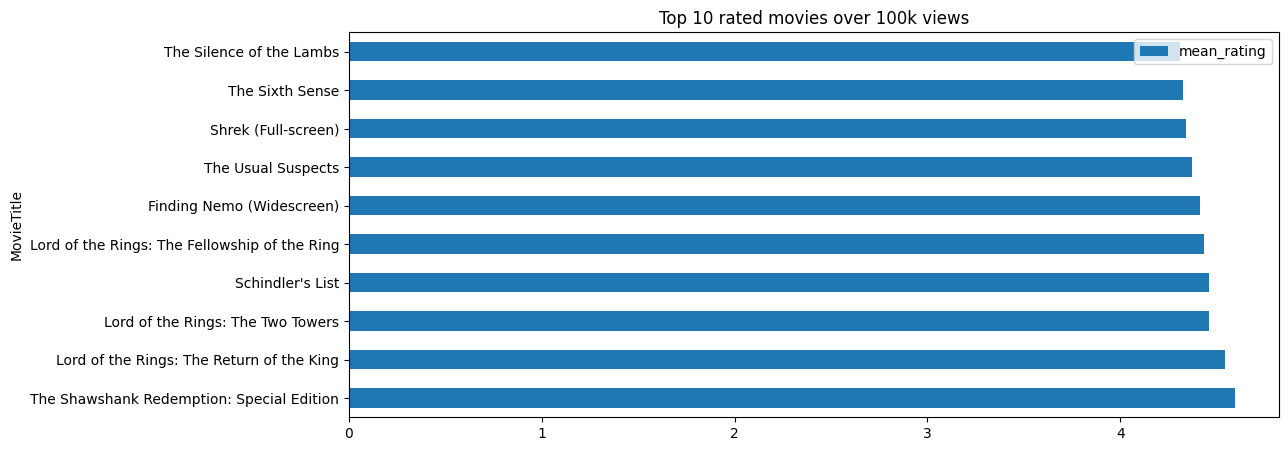

In [11]:
ch = ch.sort_values('mean_rating',ascending= False).head(10).plot(
    kind='barh',
    figsize=(12,5),
    x = 'MovieTitle',
    y = 'mean_rating',
    title='Top 10 rated movies over 100k views')

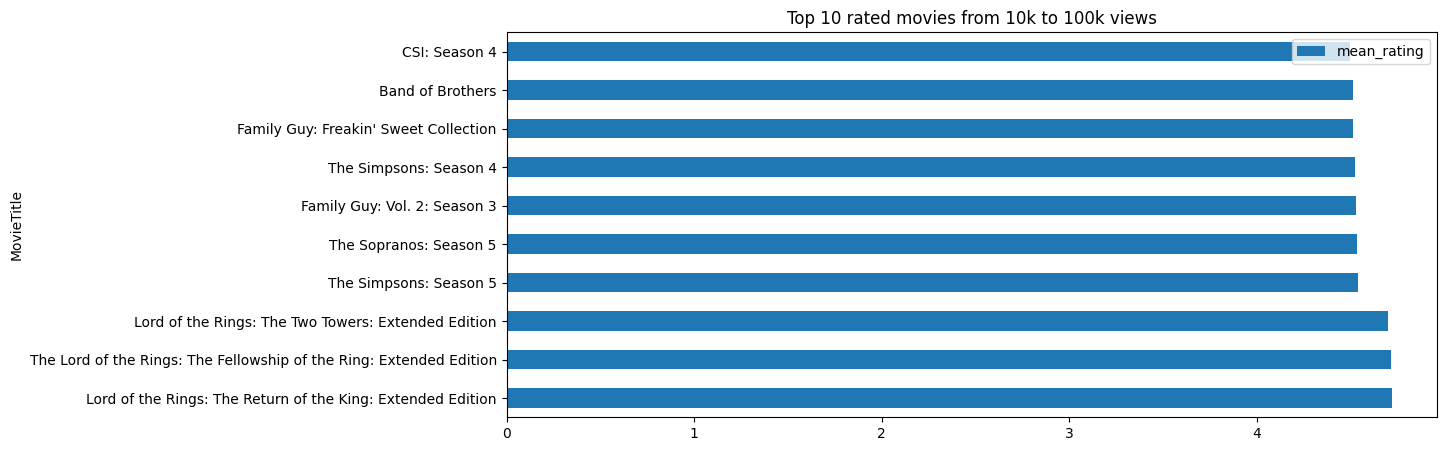

In [12]:
dh = df.loc[df.view_range =='medium',['MovieTitle','mean_rating']].drop_duplicates()\
    .sort_values('mean_rating',ascending=False).head(10).plot(
        kind='barh',
        figsize=(12,5),
        title='Top 10 rated movies from 10k to 100k views',
        x = 'MovieTitle',
        y = 'mean_rating'
    )

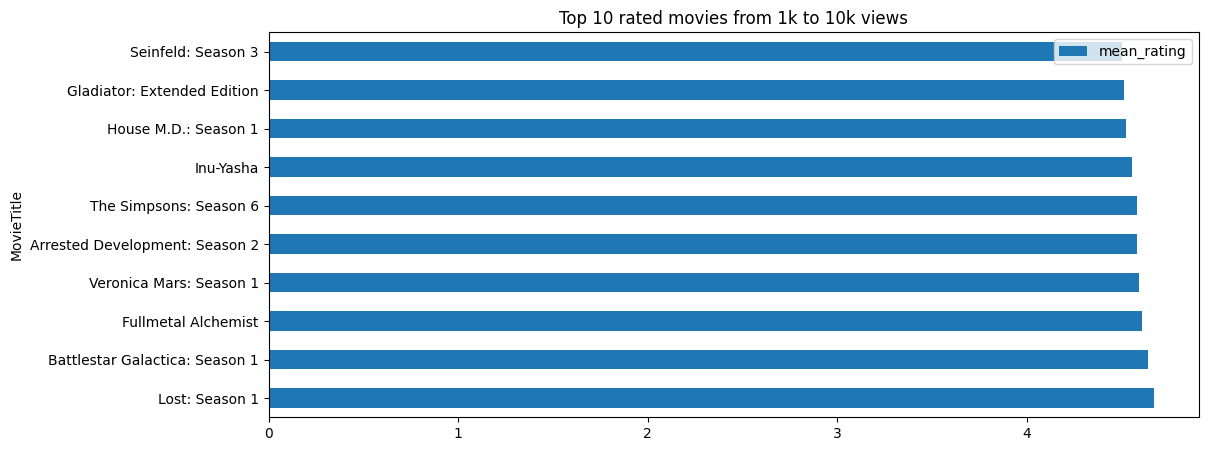

In [13]:
eh = df.loc[df.view_range =='low',['MovieTitle','mean_rating']].drop_duplicates().sort_values('mean_rating',ascending=False).head(10).plot(
        kind='barh',
        figsize=(12,5),
        title='Top 10 rated movies from 1k to 10k views',
        x = 'MovieTitle',
        y = 'mean_rating'
    )

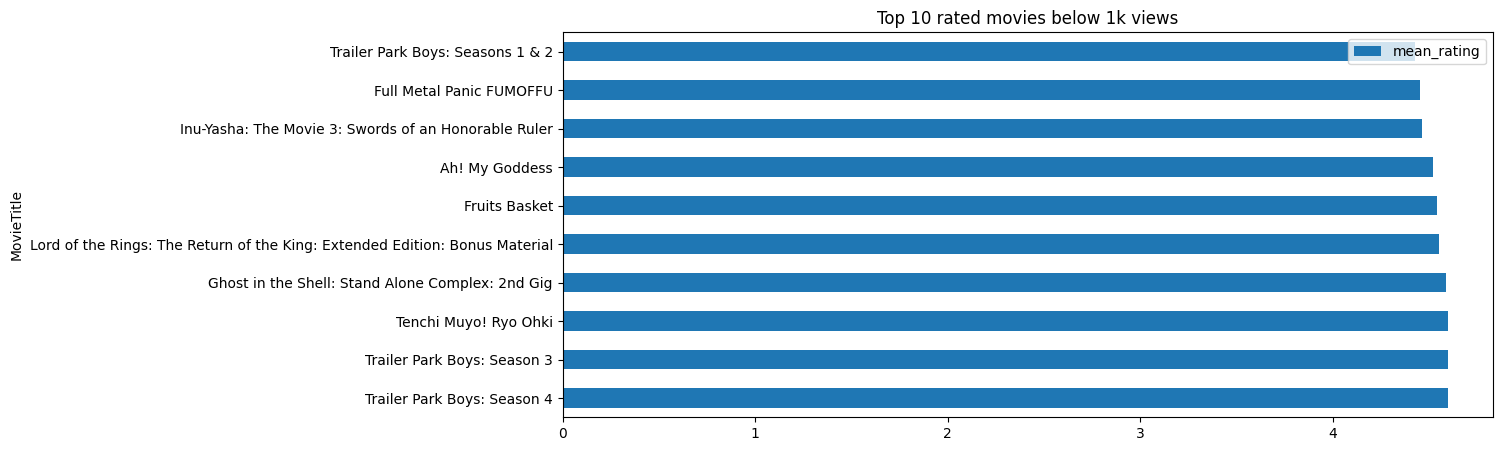

In [14]:
fh = df.loc[df.view_range =='very low',['MovieTitle','mean_rating']].drop_duplicates().sort_values('mean_rating',ascending=False).head(10).plot(
        kind='barh',
        figsize=(12,5),
        title='Top 10 rated movies below 1k views',
        x = 'MovieTitle',
        y = 'mean_rating'
    )

#### Observations:
It seems that among the top rates movies, the Feature films are the most watched. Lots of them are over 100k views.

When it comes to the top movies in sub 100k view category, more Television series and Anime names appear.

I suspect it is easier and less time consuming to complete a Feature film and rate it immediately, while one might have to invest some time to actually finish a whole season to have a complete assessment of the movie (There is a rating for each episode within the season, but i suppose the current dataset only log the rating for the whole season). Additionally, Feature Films are usually more heavily invested and advertised, so it is understandable that the majority of people will watch them more.

### Average ratings of movies across the years

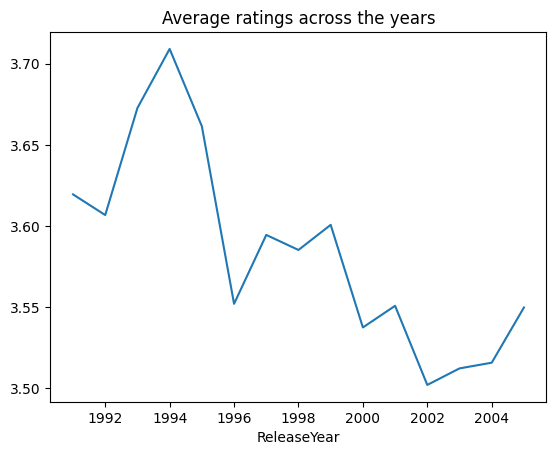

In [5]:
gh = df.groupby('ReleaseYear').Rating.mean().plot(kind='line',
                                                  title='Average ratings across the years')


There was decline in movies rating from 1990 to 2002. 
- Maybe the old movies batch were so good that the more recent movies pale in comparison ?
- Or maybe towards the end of the 20th, there were many more movies produced than before, but with low quality, making the overall ratings slump.
There was also pickup in rating starting in 2000 till 2005.


Let's find out the number of movies released across the years.

In [6]:
a = df.drop_duplicates(subset='MovieId',keep='first')

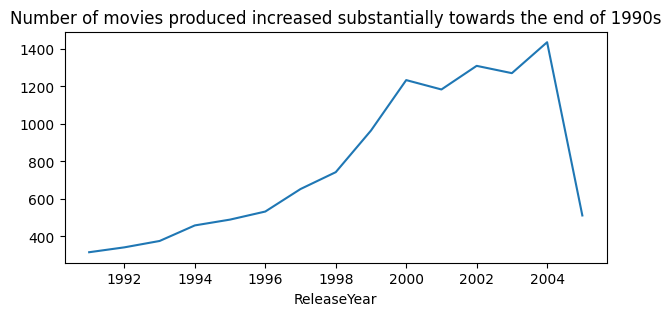

In [7]:
jh = a.groupby('ReleaseYear').MovieId.count().plot(
    kind='line',
    figsize = (7,3),
    title='Number of movies produced increased substantially towards the end of 1990s')

This explains why the average rating was declining.

In [28]:
x = df.loc[
    (df.ReleaseYear >= 1995) &
    (df.ReleaseYear <= 2002), ['ReleaseYear','Rating','MovieTitle']
].groupby('MovieTitle').Rating.mean()


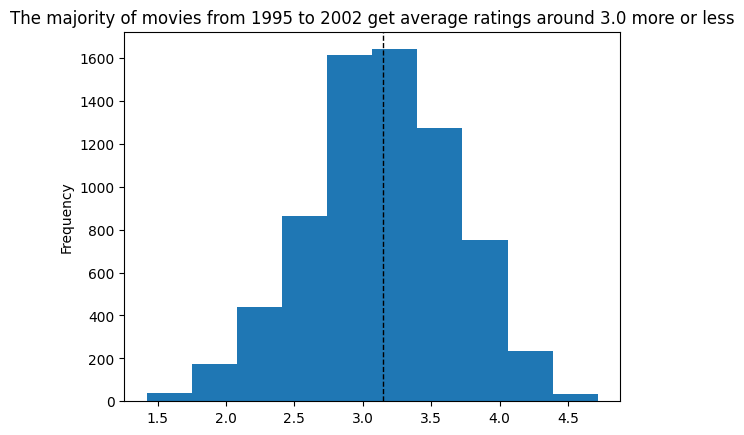

In [29]:
x.plot(kind='hist',
       title='The majority of movies from 1995 to 2002 get average ratings around 3.0 more or less')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)


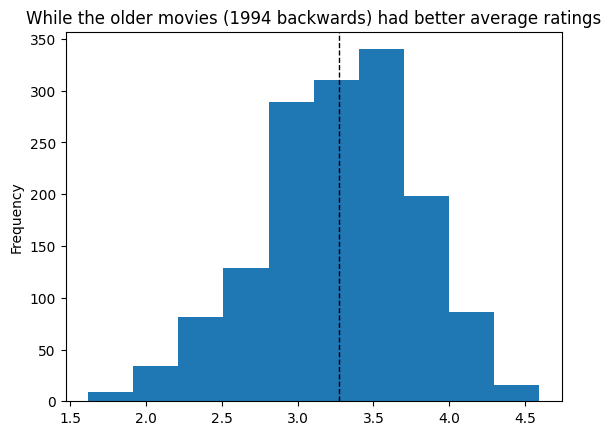

In [25]:
y = df.loc[
    df.ReleaseYear < 1995, ['ReleaseYear','Rating','MovieTitle']
].groupby('MovieTitle').Rating.mean()
y.plot(kind='hist',
                                           title='While the older movies (1994 backwards) had better average ratings')
plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)


### Is there anything interesting about movies with low rates but still attract lots of viewership?

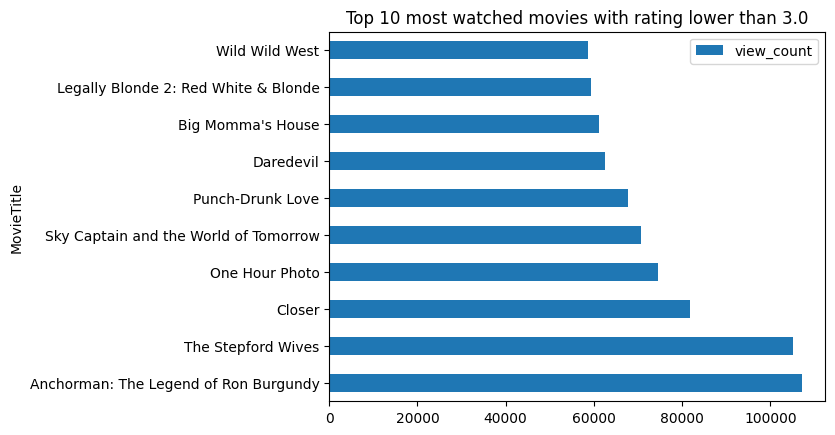

In [58]:
hh = df.loc[((df.view_range =='medium') | (df.view_range =='high'))&
       (df.mean_rating <3)].drop_duplicates(subset='MovieTitle').sort_values('view_count',ascending=False).head(10).plot(kind='barh',
                                                                                                                         title='Top 10 most watched movies with rating lower than 3.0',
                                                                                                                         x= 'MovieTitle',
                                                                                                                         y= 'view_count')

#### Observations:

Only two movies with average rating manage to break into the 100k views threshold. It seems that unless a movie is exceptional or good, it is hard for its view count to surpass 100k.

### How about average and bad movies ?

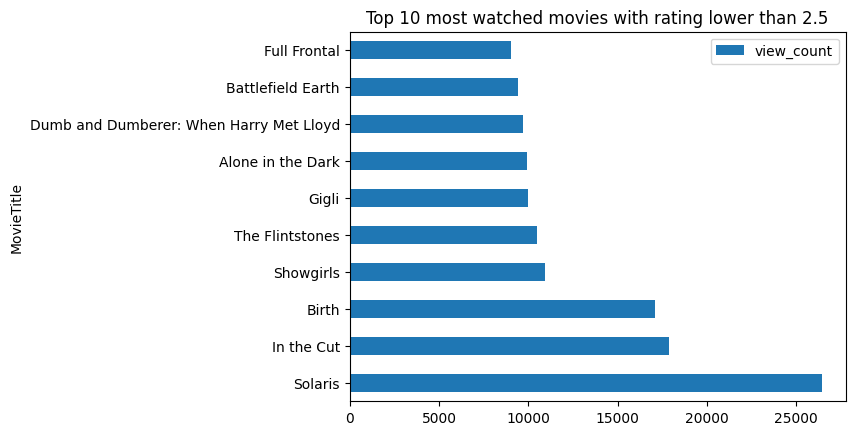

In [27]:
kh =  df.loc[
       (df.mean_rating <=2.5)].drop_duplicates(subset='MovieTitle').sort_values('view_count',ascending=False).head(10).plot(kind='barh',
                                                                                                                         title='Top 10 most watched movies with rating lower than 2.5',
                                                                                                                         x= 'MovieTitle',
                                                                                                                         y= 'view_count')

#### Observations:

Those with ratings lower than 2.5, all but one didn't even reach 20k views.

In [28]:
df.to_csv('Out2.csv')